<center> <h1>Cálculo e Análise Numérico.    &nbsp;&nbsp;&nbsp;&nbsp;     Grao en Intelixencia Artificial (Uvigo) 
    <br />
 

# Gráficos 3D

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

# Gráficos separados en novas ventás
%matplotlib qt

# Gráficos incrustados neste documento
%matplotlib inline


## Gráficos $\mathbb{R}^2 \to \mathbb{R}$

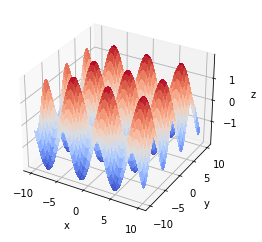

In [2]:
# Definimos a función

fig = plt.figure()
ax = fig.gca(projection='3d')

# Definimos a superficie
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X) + np.cos(Y) 
#np.sqrt(X*Y) 
#(X**2+2*Y**2)*np.exp(-X**2-Y**2)

# Debuxámola.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Curvas nivel

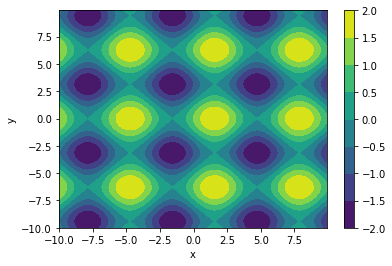

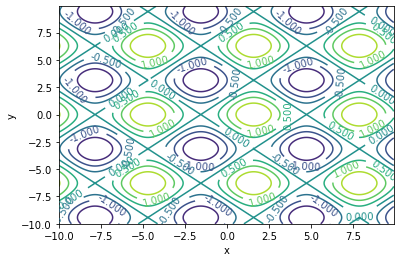

In [3]:
# Curvas de nivel (colorbar)
plt.figure()
plt.contourf(X, Y, Z)
plt.colorbar()  # Engádese a barra de cores cos valores asociados
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Curvas de nivel (colorbar)
plt.figure()
figc = plt.contour(X, Y, Z)
plt.clabel(figc) # Engádese o valor numérico a cada curva de nivel
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Curvas parametrizadas ($\mathbb{R} \to \mathbb{R}^2$)

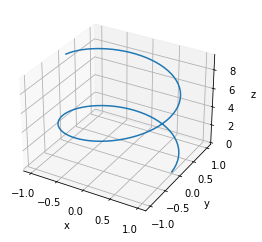

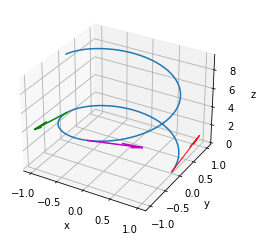

In [4]:
# Curvas parametrizadas
fig = plt.figure()
ax = plt.axes(projection="3d")
# Creación dos puntos da curva
t = np.linspace(0, 3*np.pi, 100)
x_t = np.cos(t)
y_t = np.sin(t)
z_t = t
# Representación gráfica da curva 3D
p = ax.plot3D(x_t, y_t, z_t)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


# Creamos a función
t = sp.symbols('t', real=True)
expr = sp.cos(t),sp.sin(t),t
curva3d = sp.Lambda((t),expr)
curva =  sp.lambdify((t),curva3d(t),"numpy") # Función numpy coa expresión da curva
vtan = sp.diff(sp.cos(t),t),sp.diff(sp.sin(t),t),sp.diff(t,t)
vtanf = sp.Lambda((t),vtan)
v_curva = sp.lambdify((t),vtanf(t),"numpy") # Función numpy coa expresión do vector tanxente
# Representación vectores
# Calculamos a derivada da anterior curva en t_0
t_0 = 0

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot3D(x_t, y_t, z_t) # Volvemos pintar a curva
ax.quiver(curva(t_0)[0],curva(t_0)[1],curva(t_0)[2],v_curva(t_0)[0],v_curva(t_0)[1],v_curva(t_0)[2],1,color=['r']) # Representación gráfica do vector tanxente en t_0
t_0 = np.pi
ax.quiver(curva(t_0)[0],curva(t_0)[1],curva(t_0)[2],v_curva(t_0)[0],v_curva(t_0)[1],v_curva(t_0)[2],color=['g']) # Representación gráfica do vector tanxente 
t_0 = 3*np.pi/2
ax.quiver(curva(t_0)[0],curva(t_0)[1],curva(t_0)[2],v_curva(t_0)[0],v_curva(t_0)[1],v_curva(t_0)[2],color=['m']) # Representación gráfica do vector tanxente 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()